# Review the data

In [1]:
import pandas as pd

data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [3]:
numeric_feats = ['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']
data[numeric_feats + ['price_per_unit']].describe()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

stand_data_df = data[numeric_feats]
stand_data = StandardScaler().fit_transform(stand_data_df)
print(stand_data)

# using sklearn fit_transform with pandas and return dataframe instead of numpy array
stand_data_df = pd.DataFrame(stand_data, index = stand_data_df.index, columns = stand_data_df.columns)
print(stand_data_df.head())

[[ 1.25562833 -0.79249504  2.00740743  1.12542986  0.44876222]
 [ 0.15708622 -0.61661163  1.66750286  0.91244418  0.40113894]
 [-0.38779067 -0.41401527  0.30788458  1.48686011  0.68818339]
 ...
 [ 0.09556786 -0.54967846  0.98769372  0.82289338  0.42397202]
 [-0.84478419 -0.77668389  0.30788458 -0.18475479  0.4768143 ]
 [-0.98539758 -0.78807071  1.66750286  0.42757905  0.63534112]]
   house_age  transit_distance  local_convenience_stores  latitude  longitude
0   1.255628         -0.792495                  2.007407  1.125430   0.448762
1   0.157086         -0.616612                  1.667503  0.912444   0.401139
2  -0.387791         -0.414015                  0.307885  1.486860   0.688183
3  -0.387791         -0.414015                  0.307885  1.486860   0.688183
4  -1.117223         -0.549997                  0.307885  0.834188   0.592937


In [5]:
def Standardize(df, feats):
    stand_df = df[feats]
    for col in feats:
        del df[col]
    stand = StandardScaler().fit_transform(stand_df)
    stand_df = pd.DataFrame(stand, index = stand_df.index, columns = stand_df.columns)
    new_df = pd.concat([df, stand_df], axis = 1)
    return new_df
    
test = data.copy()
test = Standardize(test, numeric_feats)
print(test)

     transaction_date  price_per_unit  house_age  transit_distance  \
0            2012.917            37.9   1.255628         -0.792495   
1            2012.917            42.2   0.157086         -0.616612   
2            2013.583            47.3  -0.387791         -0.414015   
3            2013.500            54.8  -0.387791         -0.414015   
4            2012.833            43.1  -1.117223         -0.549997   
..                ...             ...        ...               ...   
409          2013.000            15.4  -0.352637          2.378365   
410          2012.667            50.0  -1.064493         -0.788071   
411          2013.250            40.6   0.095568         -0.549678   
412          2013.000            52.5  -0.844784         -0.776684   
413          2013.500            63.9  -0.985398         -0.788071   

     local_convenience_stores  latitude  longitude  
0                    2.007407  1.125430   0.448762  
1                    1.667503  0.912444   0.401139  


# Train a Regression Model

### [Solution] View the label distribution

<ipython-input-6-271c3bfe94a5>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


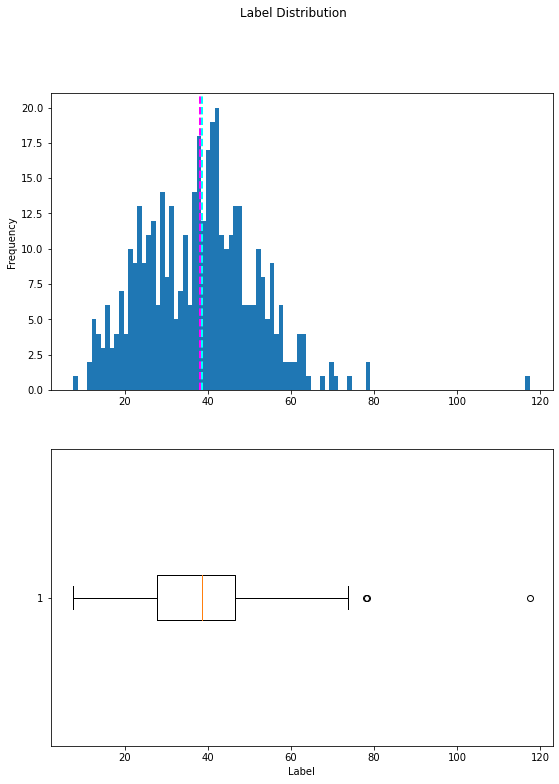

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def dist_plot(label):
    fig, ax = plt.subplots(2, 1, figsize = (9, 12))

    ax[0].hist(label, bins = 100)
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

    ax[1].boxplot(label, vert=False)
    ax[1].set_xlabel('Label')

    fig.suptitle('Label Distribution')
    fig.show()

# get the label column
label = data[data.columns[-1]]
dist_plot(label)

### [Solution] Remove outliers

<ipython-input-6-271c3bfe94a5>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


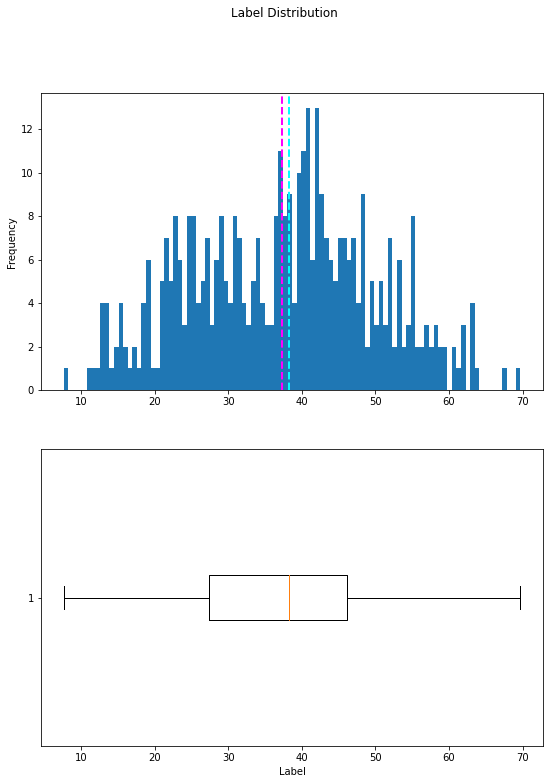

In [7]:
data = data[data['price_per_unit']<70]
label = data[data.columns[-1]]
dist_plot(label)

### View numeric correlations

In [8]:
data.columns[0:-1]

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude'],
      dtype='object')

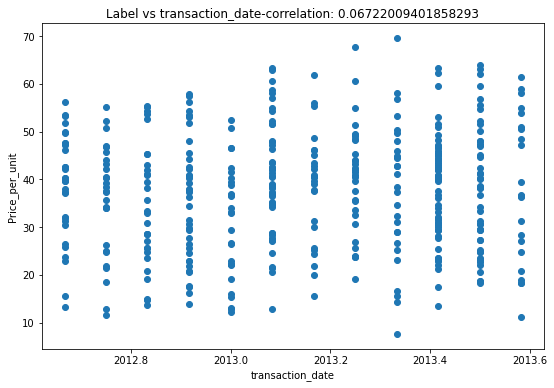

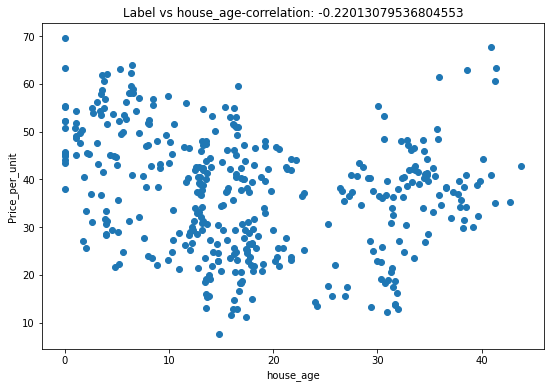

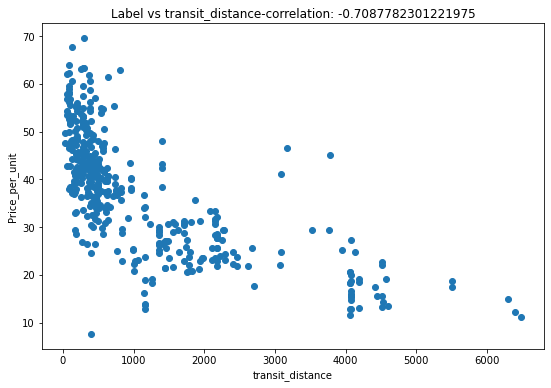

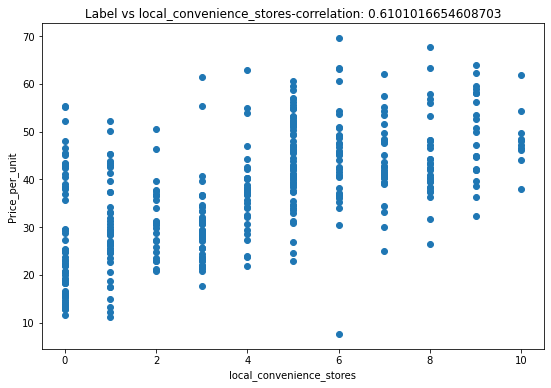

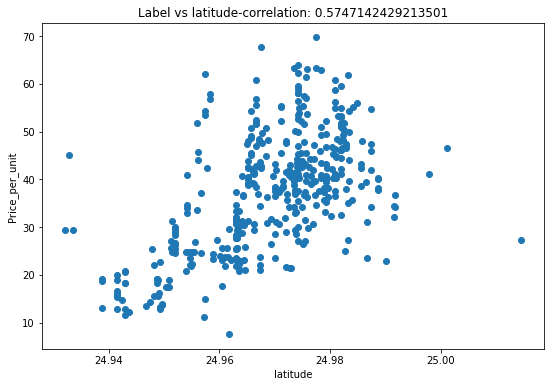

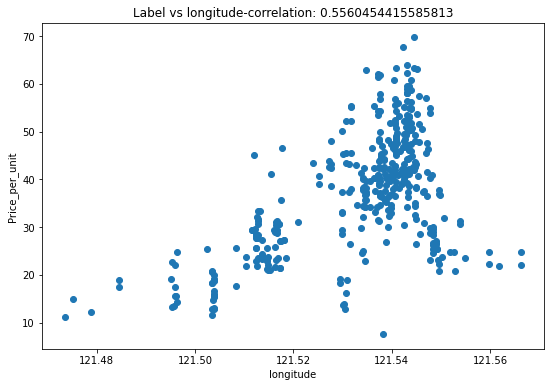

In [9]:
for col in data.columns[0:-1]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feat =  data[col]
    correlation = feat.corr(label)
    plt.scatter(x=feat, y=label)
    plt.xlabel(col)
    plt.ylabel('Price_per_unit')
    ax.set_title('Label vs '+ col+ '-correlation: '+ str(correlation))

plt.show()

### [Solution] View categorical features

#### transaction_date and local_convenience_stores seem to be discrete values, so might work better if treated as categorical features

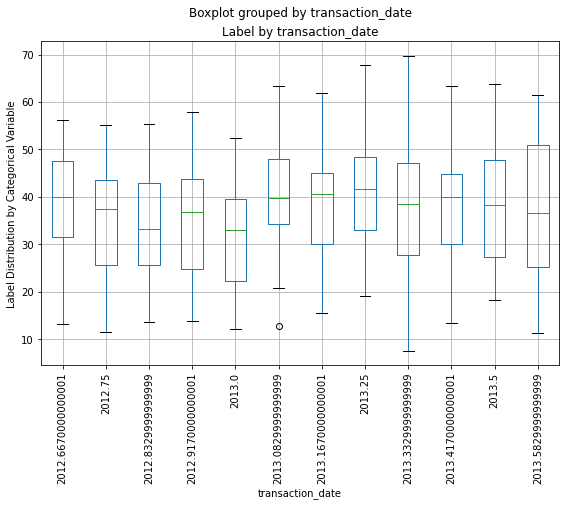

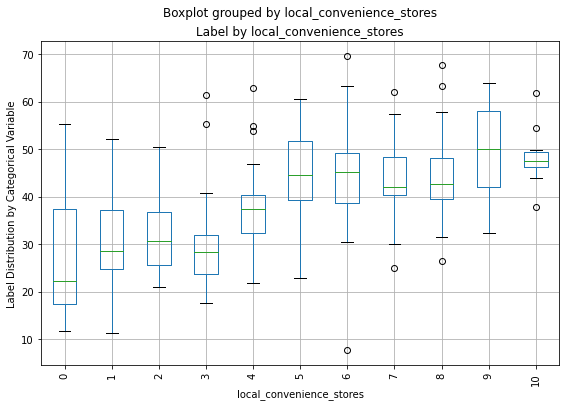

In [10]:
for col in ['transaction_date', 'local_convenience_stores']:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax, rot =90)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
    
plt.show()

In [11]:
X, y = data[numeric_feats].values, data['price_per_unit'].values
print('Features: ',X[:10], '\nLabels: ', y[:10], sep = '\n')

Features: 
[[3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02]
 [1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02]
 [3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02]
 [2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02]
 [3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02]
 [1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02]]

Labels: 
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 285 rows
Test Set: 123 rows


### [Solution] Preprocess the data and train a model in a pipeline

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_feat = [0, 1, 3, 4]
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
        transformers = [('num', numeric_transformer, numeric_feat),])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor), 
                             ('regressor', RandomForestRegressor())])

# Fit the piepline to train a linear regression model on the training set
s_model = pipeline.fit(X_train, y_train)
print(s_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


### Evaluate the model

MSE: 36.53132225535293
RMSE: 6.044114679202648
R2: 0.688276577104473


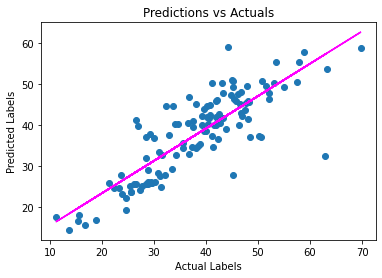

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

pred = s_model.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, pred)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [16]:
import numpy as np

predict = model.predict(X_test)
# These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
np.set_printoptions(suppress = True)
print('Predicted labels: ', np.round(predict)[:10])
print('Actual labels: ', y_test[:10])

Predicted labels:  [44. 30. 45. 51. 45. 39. 45. 24. 48. 37.]
Actual labels:  [40.8 38.4 55.  44.9 45.7 28.5 39.3 24.7 63.2 40.6]


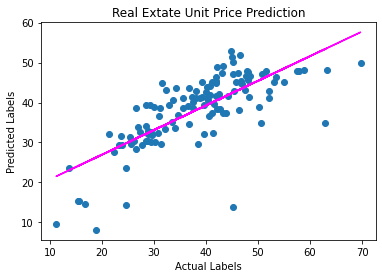

In [17]:
plt.scatter(y_test, predict)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Extate Unit Price Prediction')

z = np.polyfit(y_test, predict, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predict)
print("MES: ", mse)
rmse = np.sqrt(mse)
print("RNSE: ",rmse)
r2 = r2_score(y_test, predict)
print("R2: ", r2)

MES:  52.58866011174018
RNSE:  7.251803921214375
R2:  0.5512585878788157


In [19]:
# All usable algorithm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# all needed tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

def alg_model(alg, A_train, b_train, A_test, b_test):
    from sklearn.metrics import make_scorer, r2_score
    # score = make_scorer(r2_score)
    # gridsearch = GridSearchCV(alg, params, scoring = score, cv = 3, 
    #                         return_train_score = True)
    # gridsearch.fit(A_train, b_train)
    # print("Best parameter combination: ", gridsearch.best_params_, "\n")
    
    #model = gridsearch.beat_estimator_
    model = alg.fit(A_train, b_train)
    print(model, "\n")
    
    predict = model.predict(A_test)
    mse = mean_squared_error(b_test, predict)
    print("MSE:", mse)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(b_test, predict)
    print("R2:", r2)
    
    model_name = type(model).__name__
    plt.scatter(b_test, predict)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title(model_name)
    
    z = np.polyfit(b_test, predict, 1)
    p = np.poly1d(z)
    plt.plot(b_test, p(b_test), color = 'magenta')
    plt.show()

LinearRegression() 

MSE: 52.58866011174018
RMSE: 7.251803921214375
R2: 0.5512585878788157


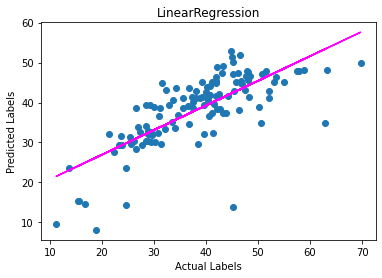

Lasso() 

MSE: 56.236637673575274
RMSE: 7.4991091253278395
R2: 0.5201302305674489


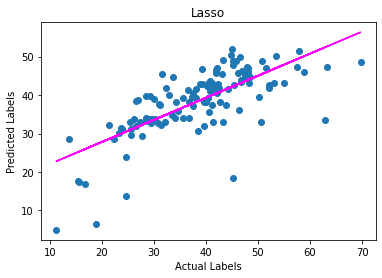

DecisionTreeRegressor() 

MSE: 58.620463527551934
RMSE: 7.656400167673574
R2: 0.4997889368799593


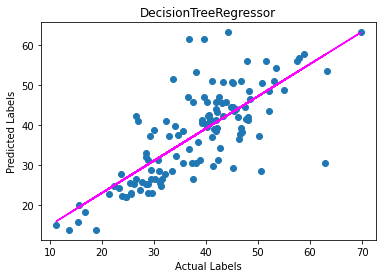

RandomForestRegressor() 

MSE: 38.30637239028986
RMSE: 6.189214198126436
R2: 0.6731299941254616


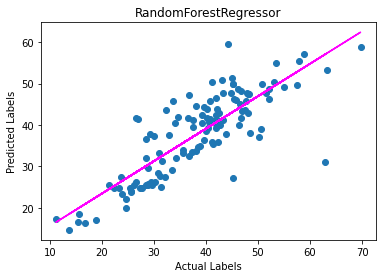

GradientBoostingRegressor() 

MSE: 37.55783792579059
RMSE: 6.128444984316216
R2: 0.6795172725217369


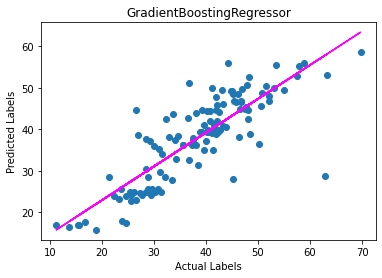

In [20]:
params = {'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
         'n_estimators': [50, 80, 100, 120, 150]}

alg_model(LinearRegression(), X_train, y_train, X_test, y_test)
alg_model(Lasso(), X_train, y_train, X_test, y_test)
alg_model(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)
alg_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)
alg_model(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

In [21]:
print("LinearRegression():", LinearRegression().get_params().keys(), "\n")
print("Lasso(): ", Lasso().get_params().keys(), "\n")
print("DecisionTreeRegressor(): ",DecisionTreeRegressor().get_params().keys(), "\n")
print("RandomForestRegressor(): ", RandomForestRegressor().get_params().keys(), "\n")
print("GradientBoostingRegressor(): ",GradientBoostingRegressor().get_params().keys(), "\n")

LinearRegression(): dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 

Lasso():  dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 

DecisionTreeRegressor():  dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter']) 

RandomForestRegressor():  dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']) 

GradientBoostingRegressor():  dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_no

In [22]:
def ranfor_model(params, A_train, b_train, A_test, b_test):
    from sklearn.metrics import make_scorer, r2_score
    score = make_scorer(r2_score)
    gridsearch = GridSearchCV(RandomForestRegressor(), params, scoring = score, cv = 3, 
                            return_train_score = True)
    gridsearch.fit(A_train, b_train)
    print("Best parameter combination: ", gridsearch.best_params_, "\n")
    
    model = gridsearch.best_estimator_
    print(model, "\n")
    
    predict = model.predict(A_test)
    mse = mean_squared_error(b_test, predict)
    print("MSE:", mse)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(b_test, predict)
    print("R2:", r2)
    
    model_name = type(model).__name__
    plt.scatter(b_test, predict)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title(model_name)
    
    z = np.polyfit(b_test, predict, 1)
    p = np.poly1d(z)
    plt.plot(b_test, p(b_test), color = 'magenta')
    plt.show()
    
    return model

Best parameter combination:  {'n_estimators': 30, 'random_state': None} 

RandomForestRegressor(n_estimators=30) 

MSE: 35.54750629632342
RMSE: 5.96217295088992
R2: 0.6966715231210516


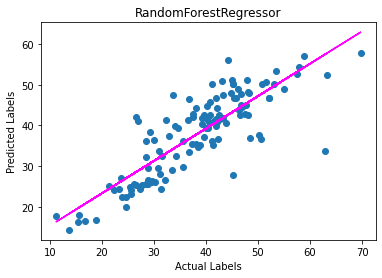

In [23]:
params = {'n_estimators': [10, 20 , 30, 40, 50],
         'random_state': [None, 1, 5, 15, 25]}

f_model = ranfor_model(params, X_train, y_train, X_test, y_test)

# Use the Trained Model

In [24]:
import joblib

filename = './real_estate.pkl'
joblib.dump(s_model, filename)

['./real_estate.pkl']

In [25]:
loaded_model = joblib.load(filename)
X_new = np.array([[16.2, 289.3248, 5, 24.98203, 121.54348],
                  [13.6, 4082.015, 0, 24.94155, 121.50381]])

results = loaded_model.predict(X_new)
print('price_per_unit:')
for pred in results:
    print(np.round(pred, 2))

price_per_unit:
49.14
16.41
